# Compare Social Maps (Topics 145 & 154) with Narrative Map (Topic 100)

- Visualize overlay of maps from the social submodel and the topic 100 map from the narrative culture & ideation bias submodel
- Uses the FDR-corrected maps downloaded from the Neurosynth website instead of unthresholded maps
- Overlay map (Red for 2 narratve maps, Blue for 2 Social Maps) 

In [1]:
%pylab inline
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from nilearn import image
import os
import pylab as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/jaimecastrellon/opt/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=300

In [3]:
#crime-type bias (minus topics 145, 154, and 100)
ctb = 'social_maps/crime_type_bias_no_145_154_100.nii.gz'

#topic map 145+154 (minus crime-type bias and topic 100)
social_cog = 'social_maps/topics_145_154_avg_bin_no_100_no_ctb.nii.gz'
#topic map 100
cult_id = 'social_maps/topic_100_bin_no_145_154_no_ctb.nii.gz'

#2 map intersections
social_cog_cult_id = 'social_maps/intersection_topics_145_154_and_100.nii.gz'
social_cog_ctb = 'social_maps/intersection_topics_145_154_and_crime_type_bias.nii.gz'
cult_id_cog_ctb = 'social_maps/intersection_topic_100_and_crime_type_bias.nii.gz'

#3 map intersections
social_cog_cult_id_ctb = 'social_maps/intersection_topics_145_154_100_and_crime_type_bias.nii.gz'

#background anatomical
img_bg = 'social_maps/underlay/mni152_2009_256.nii.gz'

# Display Overlap on Sagittal Slices

/Users/jaimecastrellon/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:2831: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


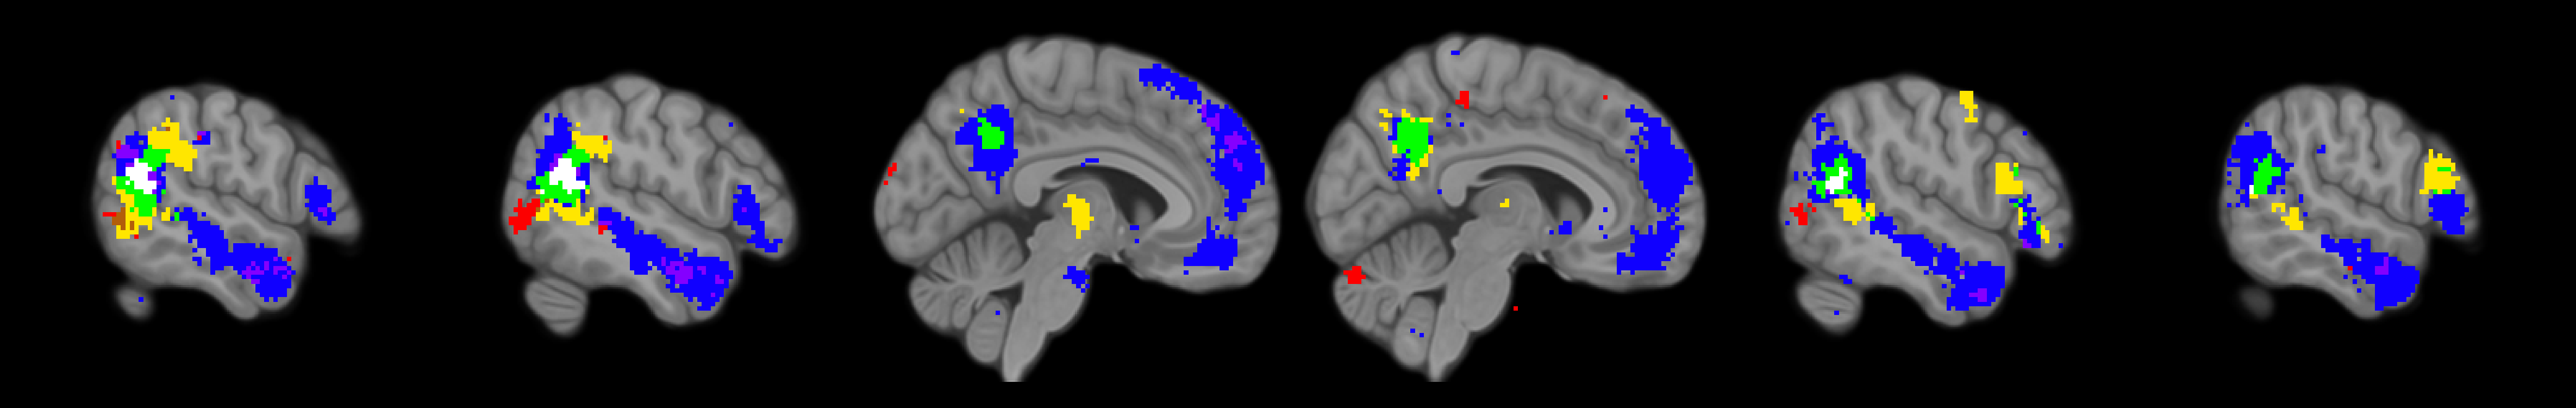

In [20]:
#first place crime-type bias in yellow
display = plotting.plot_stat_map(ctb, bg_img=img_bg, black_bg=True,
                       display_mode='x',
                       cut_coords = [56,52, 6,-6,-52,-56], annotate=False, threshold=0, vmax=1,
                       cmap=plotting.cm.alpha_cmap('#FFE600',alpha_min=1,alpha_max=1),
                       colorbar=False)

display.add_overlay(social_cog,cmap=plotting.cm.alpha_cmap('#1000FF',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #blue
display.add_overlay(cult_id,cmap=plotting.cm.alpha_cmap('#FC0000',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #red
display.add_overlay(social_cog_cult_id,cmap=plotting.cm.alpha_cmap('#8400FF',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #purple
display.add_overlay(social_cog_ctb,cmap=plotting.cm.alpha_cmap('#04FF00',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #green
display.add_overlay(cult_id_cog_ctb,cmap=plotting.cm.alpha_cmap('#b25d0a',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #orange
display.add_overlay(social_cog_cult_id_ctb,cmap=plotting.cm.alpha_cmap('#FFFFFF',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #white


#orange original: #FF8000
#orange turmeric: #FF850F
#orange turmeric, darker: #b25d0a

display.savefig('social_maps/Fig_4a.png',dpi=300)

## Render all maps on same surface - lateral surface

In [24]:
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage5')

In [77]:
#crime-type bias
ctb_surf = image.load_img(ctb) 
ctb_surf_R = surface.vol_to_surf(ctb_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
ctb_surf_L = surface.vol_to_surf(ctb_surf, fsaverage.pial_left, radius=0, interpolation='nearest')

#topic maps 145+154
social_cog_surf = image.load_img(social_cog) 
social_cog_surf_R = surface.vol_to_surf(social_cog_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
social_cog_surf_L = surface.vol_to_surf(social_cog_surf, fsaverage.pial_left, radius=0, interpolation='nearest')

#topic map 100
cult_id_surf = image.load_img(cult_id) 
cult_id_surf_R = surface.vol_to_surf(cult_id_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
cult_id_surf_L = surface.vol_to_surf(cult_id_surf, fsaverage.pial_left, radius=0, interpolation='nearest')

#overlap topic maps 145+154 & 100
social_cog_cult_id_surf = image.load_img(social_cog_cult_id) 
social_cog_cult_id_surf_R = surface.vol_to_surf(social_cog_cult_id_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
social_cog_cult_id_surf_L = surface.vol_to_surf(social_cog_cult_id_surf, fsaverage.pial_left, radius=0, interpolation='nearest')

#overlap topic maps 145+154 & crime-type bias
social_cog_ctb_surf = image.load_img(social_cog_ctb) 
social_cog_ctb_surf_R = surface.vol_to_surf(social_cog_ctb_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
social_cog_ctb_surf_L = surface.vol_to_surf(social_cog_ctb_surf, fsaverage.pial_left, radius=0, interpolation='nearest')

#overlap topic map 100 & crime-type bias
cult_id_cog_ctb_surf = image.load_img(cult_id_cog_ctb) 
cult_id_cog_ctb_surf_R = surface.vol_to_surf(cult_id_cog_ctb_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
cult_id_cog_ctb_surf_L = surface.vol_to_surf(cult_id_cog_ctb_surf, fsaverage.pial_left, radius=0, interpolation='nearest')

#overlap of all maps
social_cog_cult_id_ctb_surf = image.load_img(social_cog_cult_id_ctb) 
social_cog_cult_id_ctb_surf_R = surface.vol_to_surf(social_cog_cult_id_ctb_surf, fsaverage.pial_right, radius=0, interpolation='nearest')
social_cog_cult_id_ctb_surf_L = surface.vol_to_surf(social_cog_cult_id_ctb_surf, fsaverage.pial_left, radius=0, interpolation='nearest')


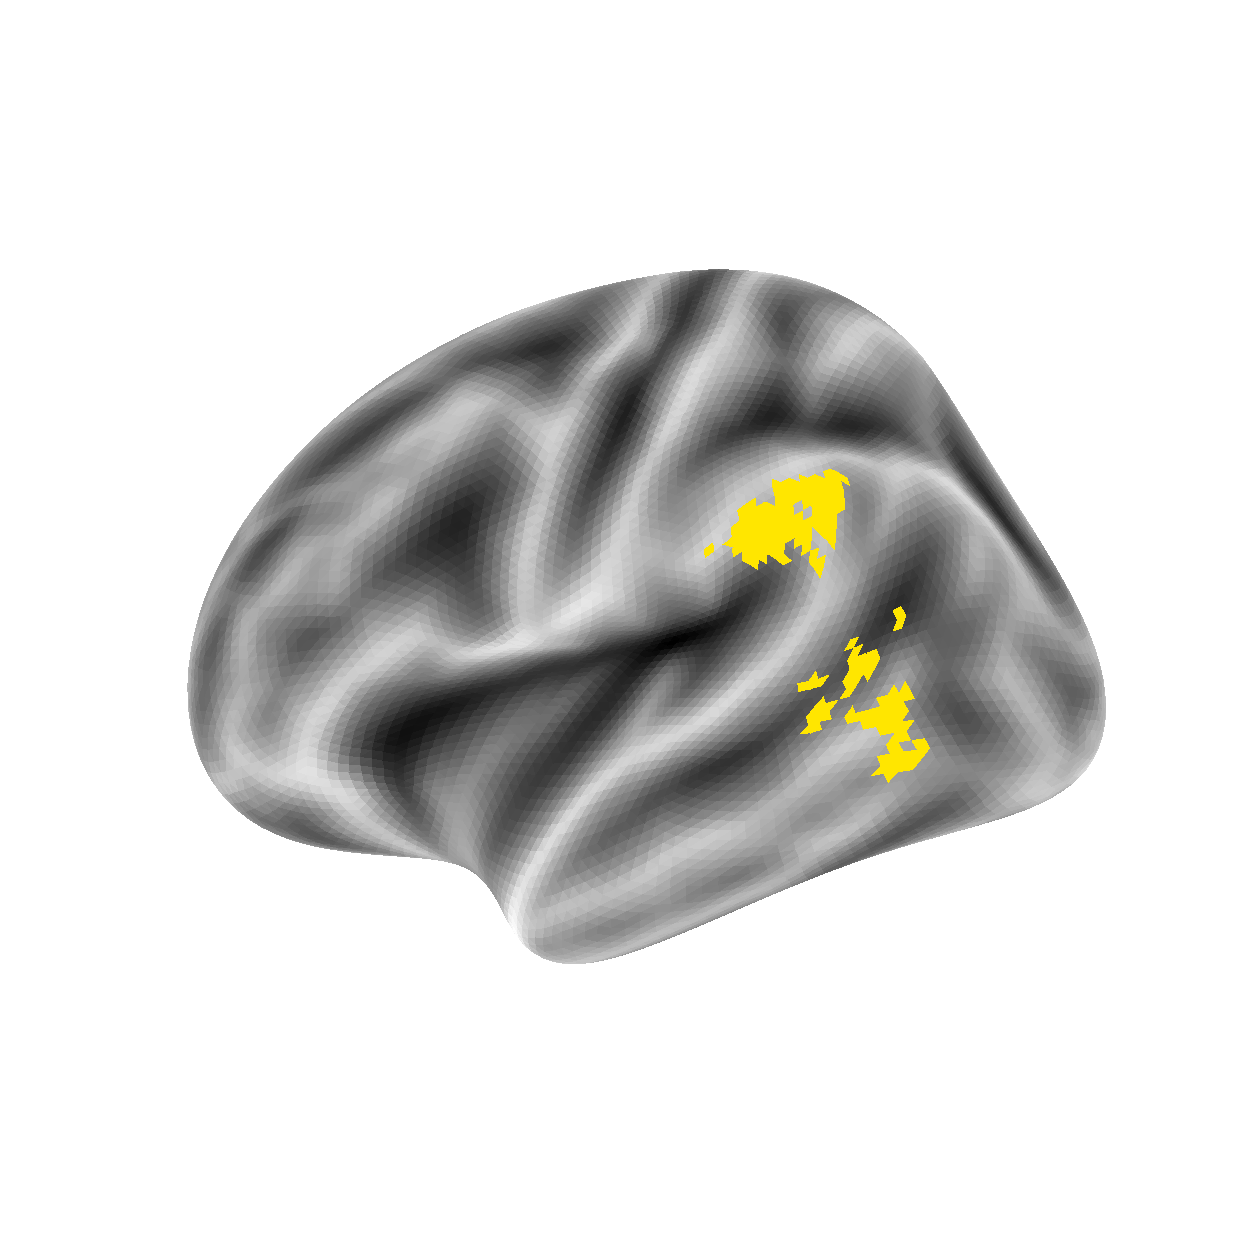

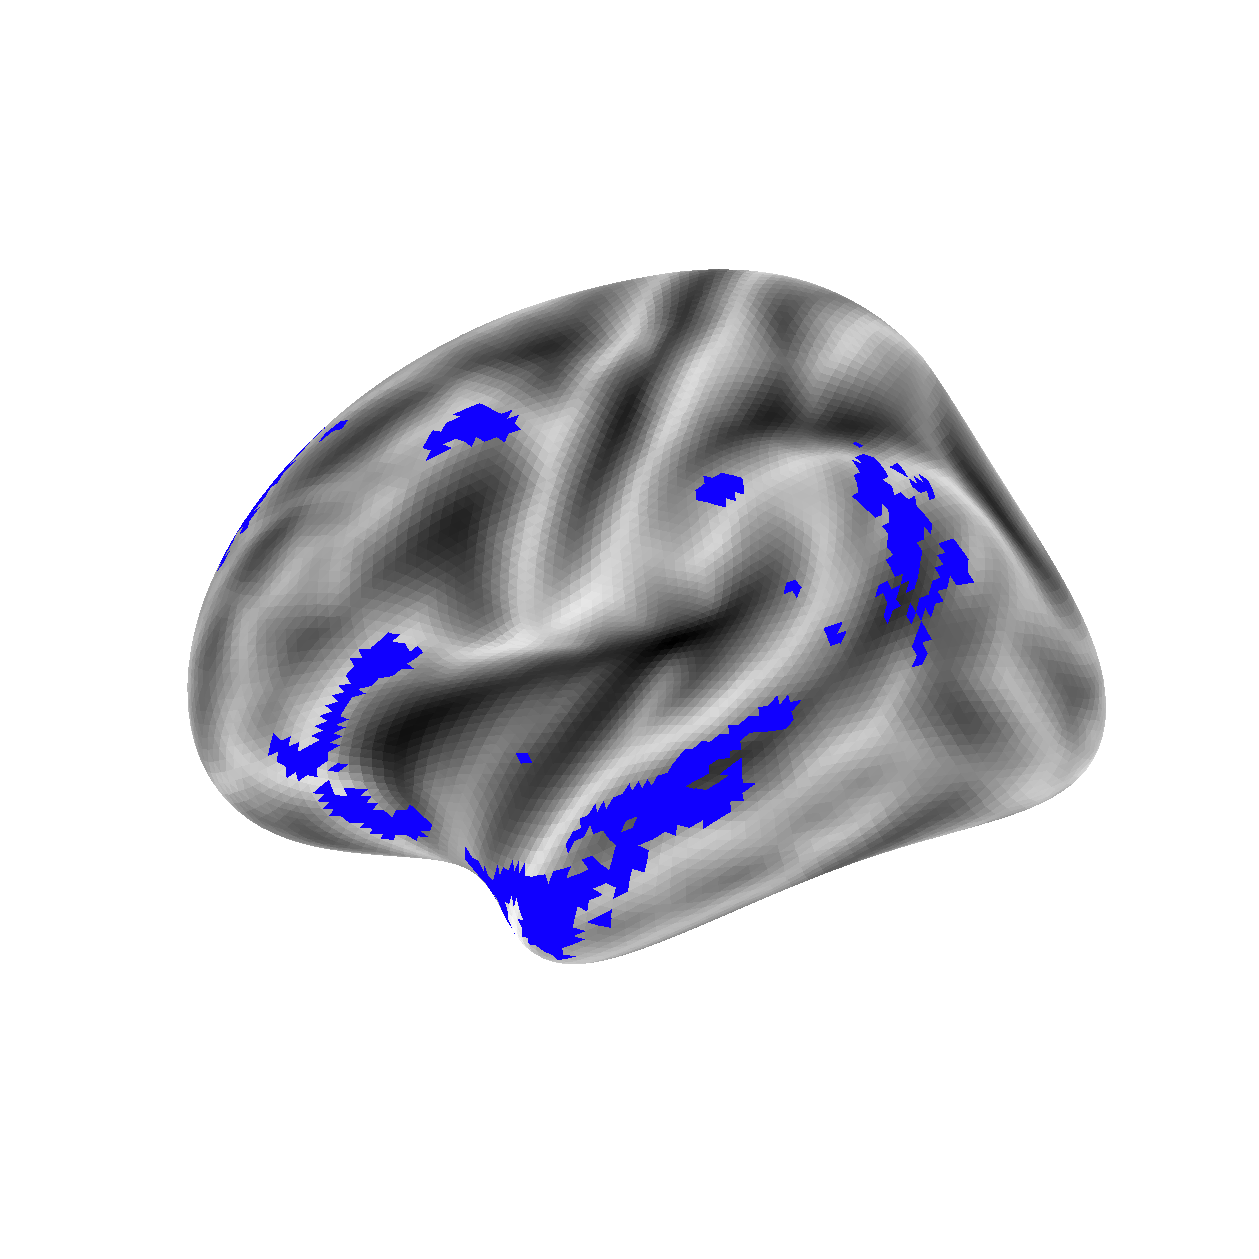

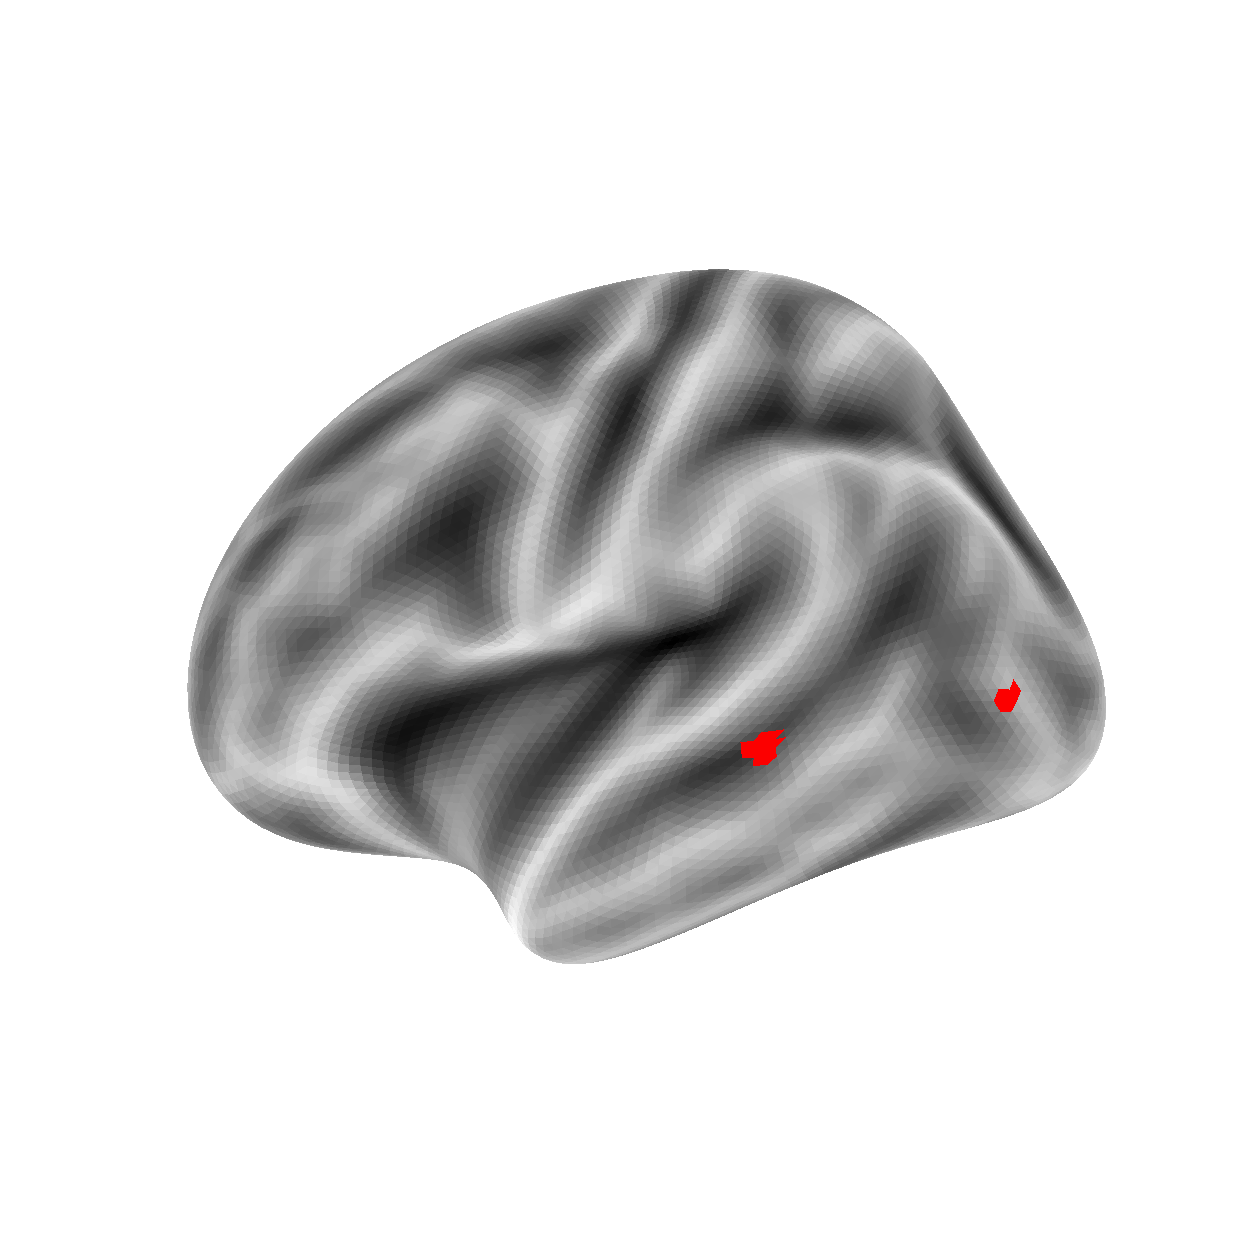

In [78]:

left_lateral = plotting.plot_surf_stat_map(fsaverage.infl_left,ctb_surf_L,hemi='left',view = 'lateral',
                                           threshold=0.5,vmax=1, colorbar=False,bg_map=fsaverage.sulc_left,
                                          cmap=plotting.cm.alpha_cmap('#FFE600',alpha_min=1,alpha_max=1))

left_lateral = plotting.plot_surf_stat_map(fsaverage.infl_left,social_cog_surf_L,hemi='left',view = 'lateral',
                                           threshold=0.5,vmax=1, colorbar=False,bg_map=fsaverage.sulc_left,
                                          cmap=plotting.cm.alpha_cmap('#1000FF',alpha_min=1,alpha_max=1))


left_lateral = plotting.plot_surf_stat_map(fsaverage.infl_left,cult_id_surf_L,hemi='left',view = 'lateral',
                                           threshold=0.5,vmax=1, colorbar=False,bg_map=fsaverage.sulc_left,
                                          cmap=plotting.cm.alpha_cmap('#FC0000',alpha_min=1,alpha_max=1))




# left_lateral.add_overlay(social_cog_cult_id_surf_L,cmap=plotting.cm.alpha_cmap('#8400FF',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #purple
# left_lateral.add_overlay(social_cog_ctb_surf_L,cmap=plotting.cm.alpha_cmap('#04FF00',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #green
# left_lateral.add_overlay(cult_id_cog_ctb_surf_L,cmap=plotting.cm.alpha_cmap('#b25d0a',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #orange
# left_lateral.add_overlay(social_cog_cult_id_ctb_surf_L,cmap=plotting.cm.alpha_cmap('#FFFFFF',alpha_min=1,alpha_max=1), threshold=0, vmax=1) #white



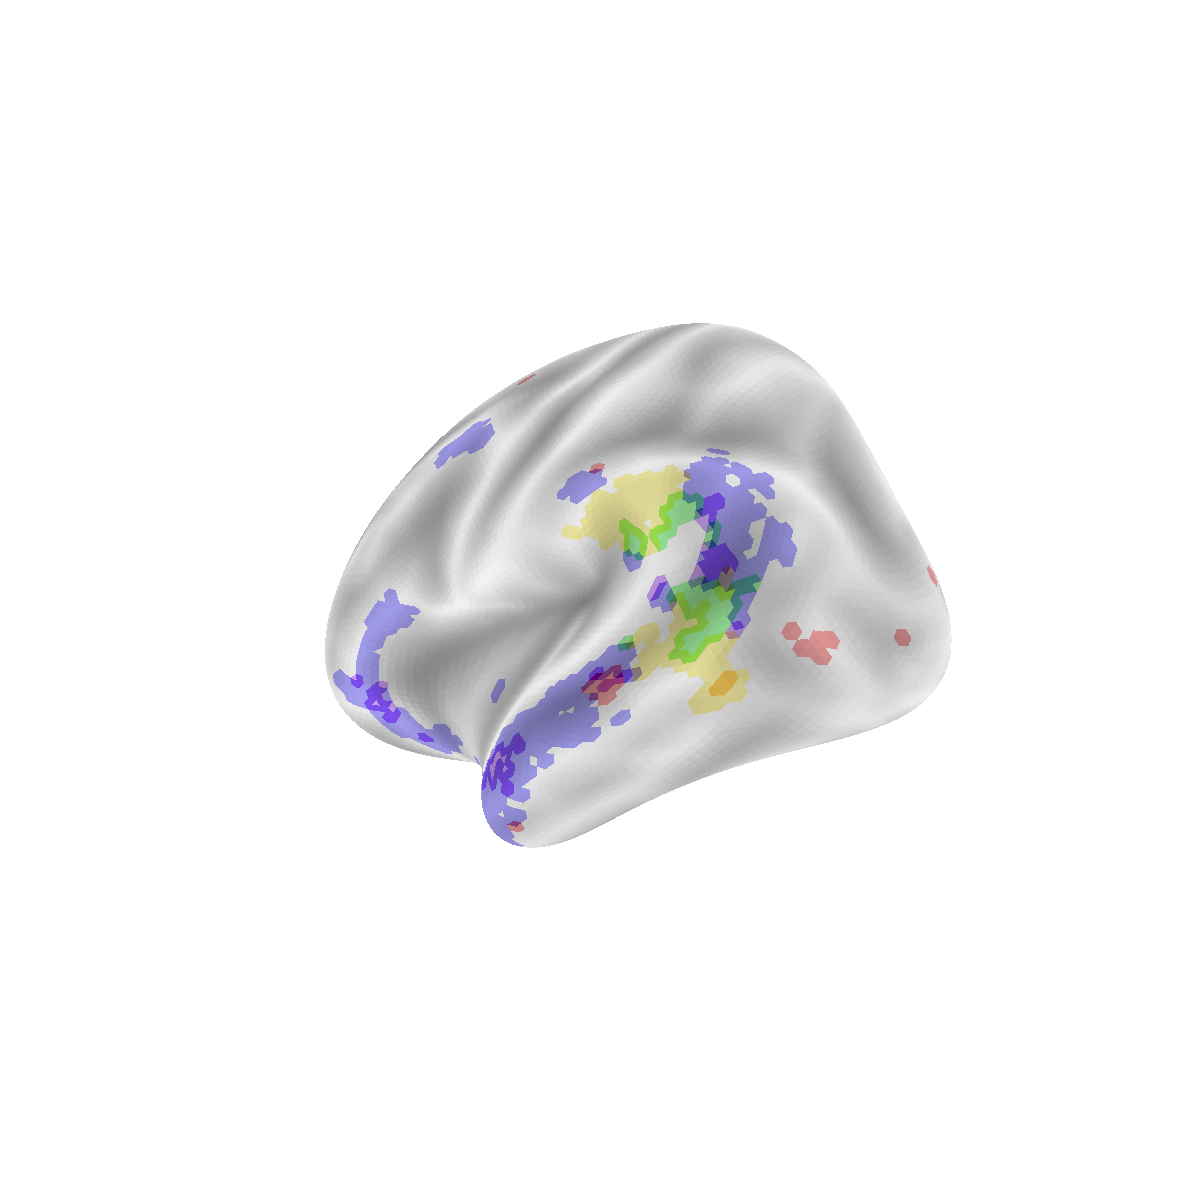

In [85]:
#build single surface with all maps
maps = [ctb_surf_L, social_cog_surf_L, cult_id_surf_L, social_cog_cult_id_surf_L,
        social_cog_ctb_surf_L, cult_id_cog_ctb_surf_L, social_cog_cult_id_ctb_surf_L]

#colors: yellow, blue, red, purple, green, orange, white
cmaps = ['#FFE600','#1000FF','#FC0000','#8400FF', '#04FF00', '#FF850F', '#FFFFFF']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_left'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = 195. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 7))

#specify figure 
plt.rcParams["figure.figsize"] = [8,5]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_left'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Left_Lateral.png', dpi=300)


## Render all maps on same surface - medial surface

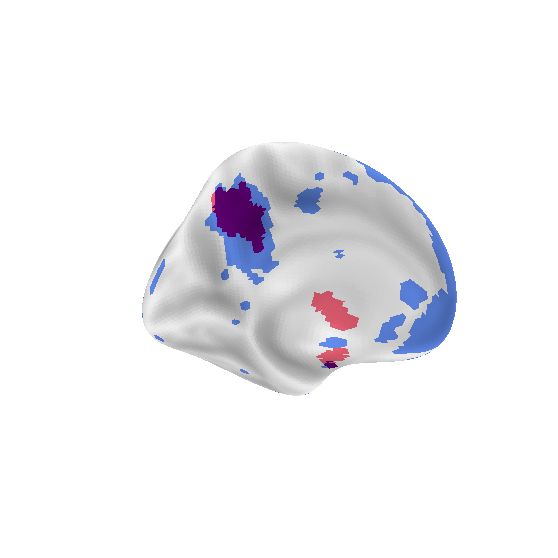

In [13]:
#build single surface with all maps
maps = [ctb_surf_L, social_surf_L]
#cmaps = ['red', 'blue' ]
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_left'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = -15. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_left'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Left_Medial.png', dpi=300)


# Right Hemisphere Render

In [14]:
#build single surface with all maps
maps = [gar_surf_R, evp_surf_R, mms_surf_R, si_surf_R]
cmaps = ['#ff8d3c','#3c84ff','#db3cff','#fff23c']

for i in range(len(maps)):
    plt.rcParams["figure.figsize"] = [16, 10.]
    plt.rcParams["figure.subplot.wspace"] = 0.01
    figR, figR_axes = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
    elev = 0.
    azim = -15.#195.#-15. 
    figR_axes.view_init(elev=elev, azim=azim)
    figR_axes.set_axis_off()

    
    #derived from plot_surf in nilearn
    #specify mesh base
    mesh = surface.load_surf_mesh(fsaverage['infl_right'])
    coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
    limits = [coords.min(), coords.max()]
    alpha = 1.0
    face_colors = np.ones((faces.shape[0], 4))
    
    #plot uncolored surface
    p3dcollec = figR_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
    #load bg map 
    bg_data = surface.load_surf_data(fsaverage['sulc_right'])
    bg_faces = np.mean(bg_data[faces], axis=1)
    bg_faces = bg_faces - bg_faces.min()
    bg_faces = bg_faces / bg_faces.max()
    bg_faces *= 0.3 #compress range to limit darkness
    face_colors = plt.cm.gray_r(bg_faces)

    surf_face_colors = np.zeros_like(face_colors)
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
    surf_face_colors -= surf_face_colors.min()
    surf_face_colors /= surf_face_colors.max()


    #add background
    face_colors *= surf_face_colors 

    #set face colors in figure
    p3dcollec.set_facecolors(face_colors)
    plt.savefig('social_maps/social_maps_Right_'+str(i)+'.png', dpi=300)


NameError: name 'gar_surf_R' is not defined

## Render all maps on the same brain - Lateral surface

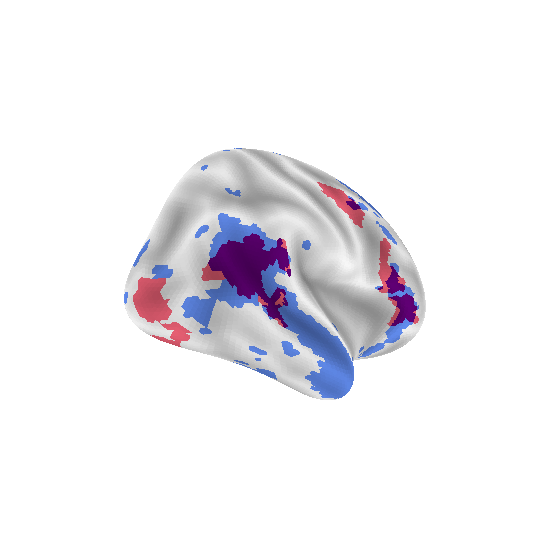

In [15]:
#build single surface with all maps
maps = [ctb_surf_R, social_surf_R]
#cmaps = ['red', 'blue' ]
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_right'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = -15. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_right'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Right_Lateral.png', dpi=300)




## Render all maps on the same brain - Medial surface

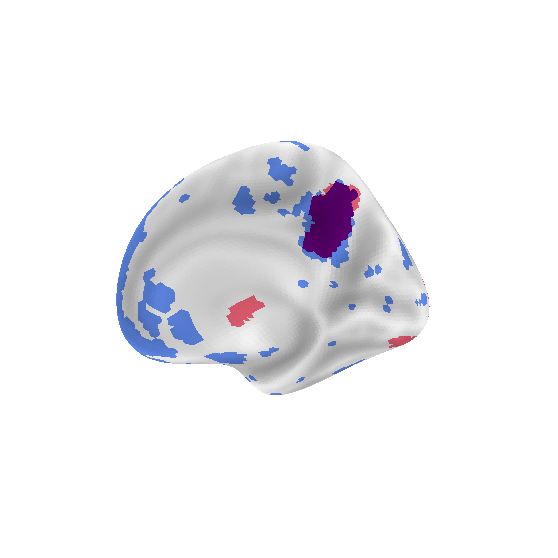

In [16]:
#build single surface with all maps
maps = [ctb_surf_R, social_surf_R]
#cmaps = ['red', 'blue' ]
cmaps = ['#ff3755','#3773ff']

#derived from plot_surf in nilearn
#specify mesh base
mesh = surface.load_surf_mesh(fsaverage['infl_right'])
coords, faces = mesh[0], mesh[1] #coords are 3-d coords of vertices, faces are 3 indices into the coords defining a triangle in 3-D space
limits = [coords.min(), coords.max()]
elev = 0.
azim = 195. #195. 
alpha = 1.0
face_colors = np.ones((faces.shape[0], 4))

#specify figure 
plt.rcParams["figure.figsize"] = [16,10]
fig2R, fig2R_axes = plt.subplots(1,1, subplot_kw={'projection': '3d'})
fig2R_axes.view_init(elev=elev, azim=azim)
fig2R_axes.set_axis_off()

#plot uncolored surface
p3dcollec = fig2R_axes.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0., 
                              antialiased=False, color='white')
#load bg map 
bg_data = surface.load_surf_data(fsaverage['sulc_right'])
bg_faces = np.mean(bg_data[faces], axis=1)
bg_faces = bg_faces - bg_faces.min()
bg_faces = bg_faces / bg_faces.max()
bg_faces *= 0.5 #compress range to limit darkness
face_colors = plt.cm.gray_r(bg_faces)


surf_face_colors = np.zeros_like(face_colors)
for i in range(len(maps)):
    surf_map_data = surface.load_surf_data(maps[i]) #data for each vertex (3-D locations in coords, len=coords)
    surf_map_faces = np.mean(surf_map_data[faces], axis=1)  #average of data values from the 3 defining vertices (len=faces)
    vmin = 0. #np.nanmin(surf_map_faces)
    vmax = 0.01 #np.nanmax(surf_map_faces)
    surf_map_faces = surf_map_faces - vmin
    #surf_map_faces = surf_map_faces / (vmax - vmin)
    floor_inds = np.where(np.abs(surf_map_faces) < 0.1)
    surf_map_faces[floor_inds] = 0.0
    cap_inds = np.where(np.abs(surf_map_faces) >= 0.01)
    surf_map_faces[cap_inds] = 1.0
    kept_indices = np.where(np.abs(surf_map_faces) >= 0.0)[0]
    #cmap = plt.cm.get_cmap(cmaps[i]) #get cmap for this neuromap by cmaps string
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", cmaps[i]])
    try: 
        surf_face_colors[kept_indices] +=  cmap(surf_map_faces[kept_indices])
    except: 
        surf_face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
surf_face_colors -= surf_face_colors.min()
surf_face_colors /= surf_face_colors.max()


#add background
face_colors *= surf_face_colors 

#range correct
#face_colors -= face_colors.min()
#face_colors /= face_colors.max()
#cap at 1 
#cap_inds = np.where(np.abs(face_colors) >= 1.0)
#face_colors[cap_inds] = 1.0 

#set face colors in figure
p3dcollec.set_facecolors(face_colors)
plt.savefig('social_maps/social_maps_Right_Medial.png', dpi=300)




## Axial slices

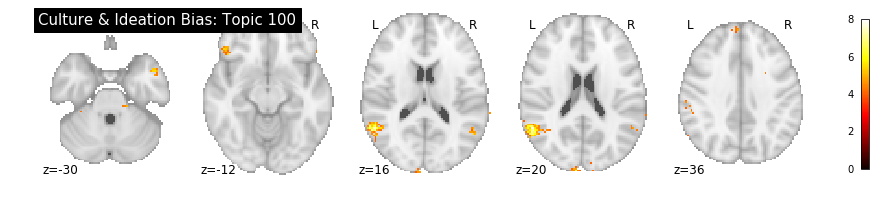

In [10]:
plotting.plot_stat_map(cib, display_mode='z',  cut_coords=[-30, -12, 16, 20, 36],
                       title="Culture & Ideation Bias: Topic 100")

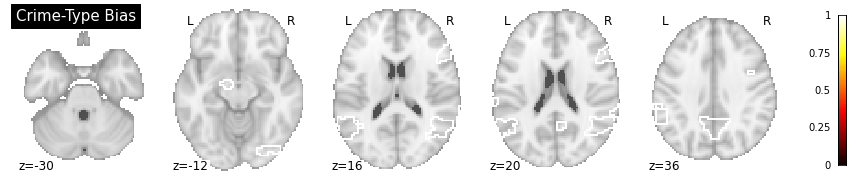

In [20]:
plotting.plot_stat_map(ctb, display_mode='z',  cut_coords=[-30, -12, 16, 20, 36],
                       title="Crime-Type Bias")

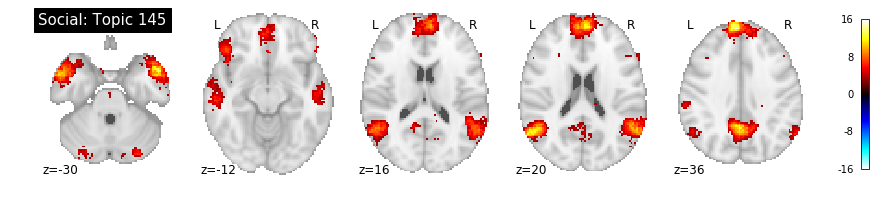

In [12]:
plotting.plot_stat_map(mms, display_mode='z', cut_coords=[-30, -12, 16, 20, 36],
                       title="Social: Topic 145")

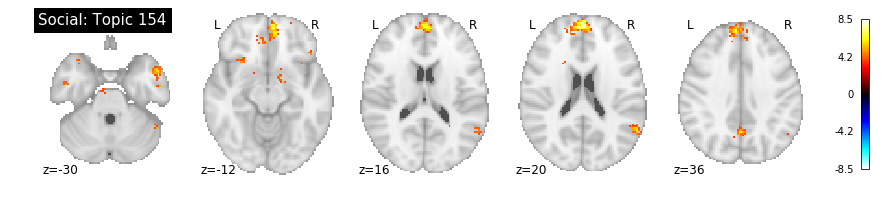

In [13]:
plotting.plot_stat_map(si, display_mode='z', cut_coords=[-30, -12, 16, 20, 36],
                       title="Social: Topic 154")

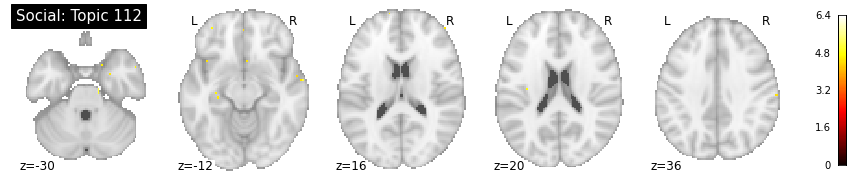

In [15]:
plotting.plot_stat_map(cec, display_mode='z', cut_coords=[-30, -12, 16, 20, 36],
                       title="Social: Topic 112")

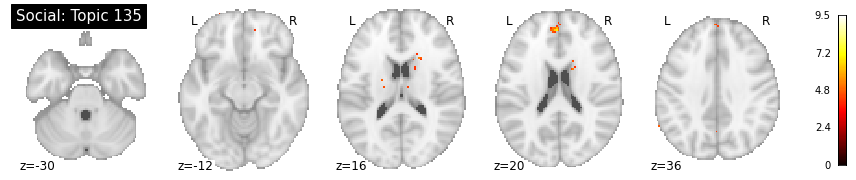

In [16]:
plotting.plot_stat_map(bgm, display_mode='z', cut_coords=[-30, -12, 16, 20, 36],
                       title="Social: Topic 135")